### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피처/특성 : 무게
- 라벨/타겟 : 길이
- 학습 방법 : 지도학습 + 예측 => KNN기반의 회귀
- 학습 / 테스트 데이터 준비 : 7대3

In [96]:
# (1) 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [97]:
file = '../data/fish.csv'
pd.read_csv(file)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [98]:
fishDF = pd.read_csv(file, usecols=[0, 1, 2])
#fishDF

In [99]:
# 필터링
mask = fishDF['Species'] == 'Perch'
perchDF = fishDF[mask]
perchDF.reset_index(drop = True, inplace = True)

In [100]:
perchDF.info()
perchDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


Text(0.5, 1.0, 'Relation of Weight & Length')

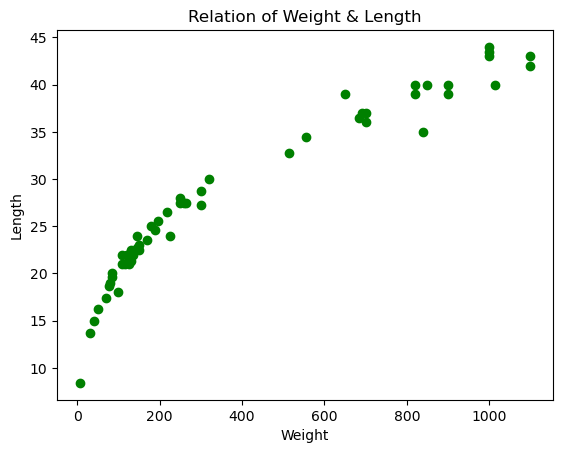

In [101]:
plt.scatter(perchDF['Weight'], perchDF['Length'], c = 'g')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.title('Relation of Weight & Length')

In [102]:
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [110]:
X_train, X_test, y_train, y_test = train_test_split(perchDF[['Weight']], perchDF['Length'], test_size = 0.3, random_state=42) # random_state를 지정하면 값이 고정됨.

In [111]:
print(f"X_train : {X_train.shape}")
print(X_train.head(2))
print()
print(f"y_train : {y_train.shape}")
print(y_train.head(2))
print()
print(f"X_test : {X_test.shape}")
print(X_test.head(2))
print()
print(f"y_test : {y_test.shape}")
print(y_test.head(2))

print()

X_train : (39, 1)
    Weight
4     70.0
41   700.0

y_train : (39,)
4     17.4
41    36.0
Name: Length, dtype: float64

X_test : (17, 1)
   Weight
0     5.9
5   100.0

y_test : (17,)
0     8.4
5    18.0
Name: Length, dtype: float64



In [112]:
# scaler = StandardScaler()

In [113]:
# scaler.fit(X_train)
# scaled_X_train = scaler.transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# print(scaled_X_train, scaled_X_test)

[[-1.00008748]
 [ 0.77960031]
 [-0.68934834]
 [ 1.2033355 ]
 [ 1.11858846]
 [ 1.62707069]
 [-0.85884241]
 [-0.95771396]
 [-0.8305934 ]
 [-0.56222778]
 [-0.46335624]
 [ 1.90956081]
 [ 1.34458056]
 [-0.78821988]
 [-0.87296692]
 [-0.44923173]
 [ 1.6694442 ]
 [ 0.25416868]
 [-0.58200209]
 [ 0.73722679]
 [-1.10743372]
 [-0.78821988]
 [-1.08483451]
 [ 0.7513513 ]
 [ 1.17508649]
 [-0.35036019]
 [-0.71759735]
 [ 0.63835525]
 [-0.88709143]
 [-0.77409538]
 [-0.88709143]
 [ 1.62707069]
 [-0.77409538]
 [-0.97183846]
 [ 0.77960031]
 [-0.85884241]
 [-0.64132502]
 [ 1.90956081]
 [ 0.37281453]] [[-1.18116365]
 [-0.91534044]
 [-0.49160525]
 [-0.8305934 ]
 [-0.8305934 ]
 [ 1.11858846]
 [-0.29386216]
 [-0.66674913]
 [ 1.34458056]
 [-0.84471791]
 [ 1.62707069]
 [-1.05234815]
 [-0.49160525]
 [-0.35036019]
 [-0.95771396]
 [-0.81646889]
 [-0.97748827]]


In [138]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor()

In [145]:
test_scoreList = []
train_scoreList =[]


for k in range(1,30) :
    fishmodel = KNeighborsRegressor(n_neighbors=k)
    fishmodel.fit(X_train, y_train)
    #fishmodel.score(X_test, y_test)
    train_scoreList.append(fishmodel.score(X_train, y_train))
    test_scoreList.append(fishmodel.score(X_test, y_test))

In [147]:
print(f'Train Score : {train_scoreList}')
print(f'Test Score : {test_scoreList}')

Train Score : [0.9979992479258801, 0.9892931133743963, 0.9823824535845268, 0.9791462015506822, 0.9752265126682342, 0.9728906701756549, 0.9677991375023381, 0.964011145765662, 0.9578242344347293, 0.9525131600016099, 0.9467500534180131, 0.9402117196316967, 0.9321197234713202, 0.9273182093580031, 0.9202996631327475, 0.9128080287841946, 0.8975986753044082, 0.8822694068796031, 0.8653012144929018, 0.8431326588186564, 0.8216339768210957, 0.7940013984107018, 0.7651614626515648, 0.7394008260263476, 0.7065525630544363, 0.6713766960449301, 0.6341899381087786, 0.6002096291249055, 0.5599581163294042]
Test Score : [0.9646390528128945, 0.9501394032643061, 0.9409031627882094, 0.9310832468679238, 0.9192157528131609, 0.9070138055450188, 0.8928566397647928, 0.8793038911766196, 0.8663327241821104, 0.8547070554885844, 0.8449395354306931, 0.8338730481248111, 0.8190797012048547, 0.8185172779770518, 0.8104993189861951, 0.7957132274753906, 0.7761940417564177, 0.75390673894008, 0.7332223784413061, 0.710133543530

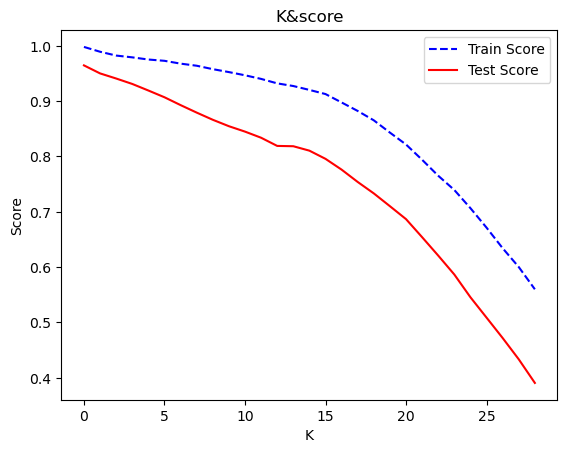

In [149]:
# K개수에 따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, 'b--', label = 'Train Score')
plt.plot(test_scoreList, 'r-', label = 'Test Score')
plt.title('K&score')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.show()

In [150]:
test_scoreList.index(max(test_scoreList))

0

In [151]:
fishmodel = KNeighborsRegressor(n_neighbors=1) # n_neighbors = 하이퍼 파라미터
fishmodel.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [152]:
fishmodel.score(X_test, y_test)

0.9646390528128945

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 모델의 성능을 평가할 떄 사용함

y_pre = fishmodel.predict(perchDF[['Weight']]) # 예측값 계산
y_pre = np.round(y_pre, 1)

# 결정 계수 값
print('결정계수값 :', r2_score(perchDF['Length'], y_pre))

# 평균제곱오차
print('평균제곱오차 :', mean_squared_error(perchDF['Length'], y_pre))

print('루트평균제곱오차 :', mean_squared_error(perchDF['Length'], y_pre, squared =False))

# 평균절댓값오차
print('절대제곱오차 :', mean_absolute_error(perchDF['Length'], y_pre))



결정계수값 : 0.9882117123988442
평균제곱오차 : 0.9423214285714282
루트평균제곱오차 : 0.9707324186259714
절대제곱오차 : 0.4339285714285714


In [157]:
#<진우 님 코드>
# 5. 성능 평가
# - 과대 적합을 판단할 수 있다.
#   : 예측값과 실제값의 차이를 나타낸 지표로 
# 1) MSE
# print('1) MSE:', mean_squared_error(y_test, y_pred))    # 7.42
# # 2) MAE
# print('2) MAE:', mean_absolute_error(y_test, y_pred))   # 1.739
# # 3) R2
# r2_scores = r2_score(y_test, y_pred)
# print('3) R2:', r2_scores)   # 0.88
# # 4) RMSE
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# print('4) RMSE:', rmse) # 2.724

검사 

1) 훈련용 데이터를 넣어서 검사
2) 테스트용 데이터를 넣어서 검사
